# Problem statement:
Principal component Analysis

# Q1. Import libraries and Load the Data file into Python DataFrame and view top 10 rows

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('bc2.csv')
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.

In [34]:
df[df['Bare Nuclei'].str.isdigit() == False]
df['Bare Nuclei']=df['Bare Nuclei'].replace('?', np.nan)
df = df.apply(lambda x: x.fillna(x.median()))


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences.

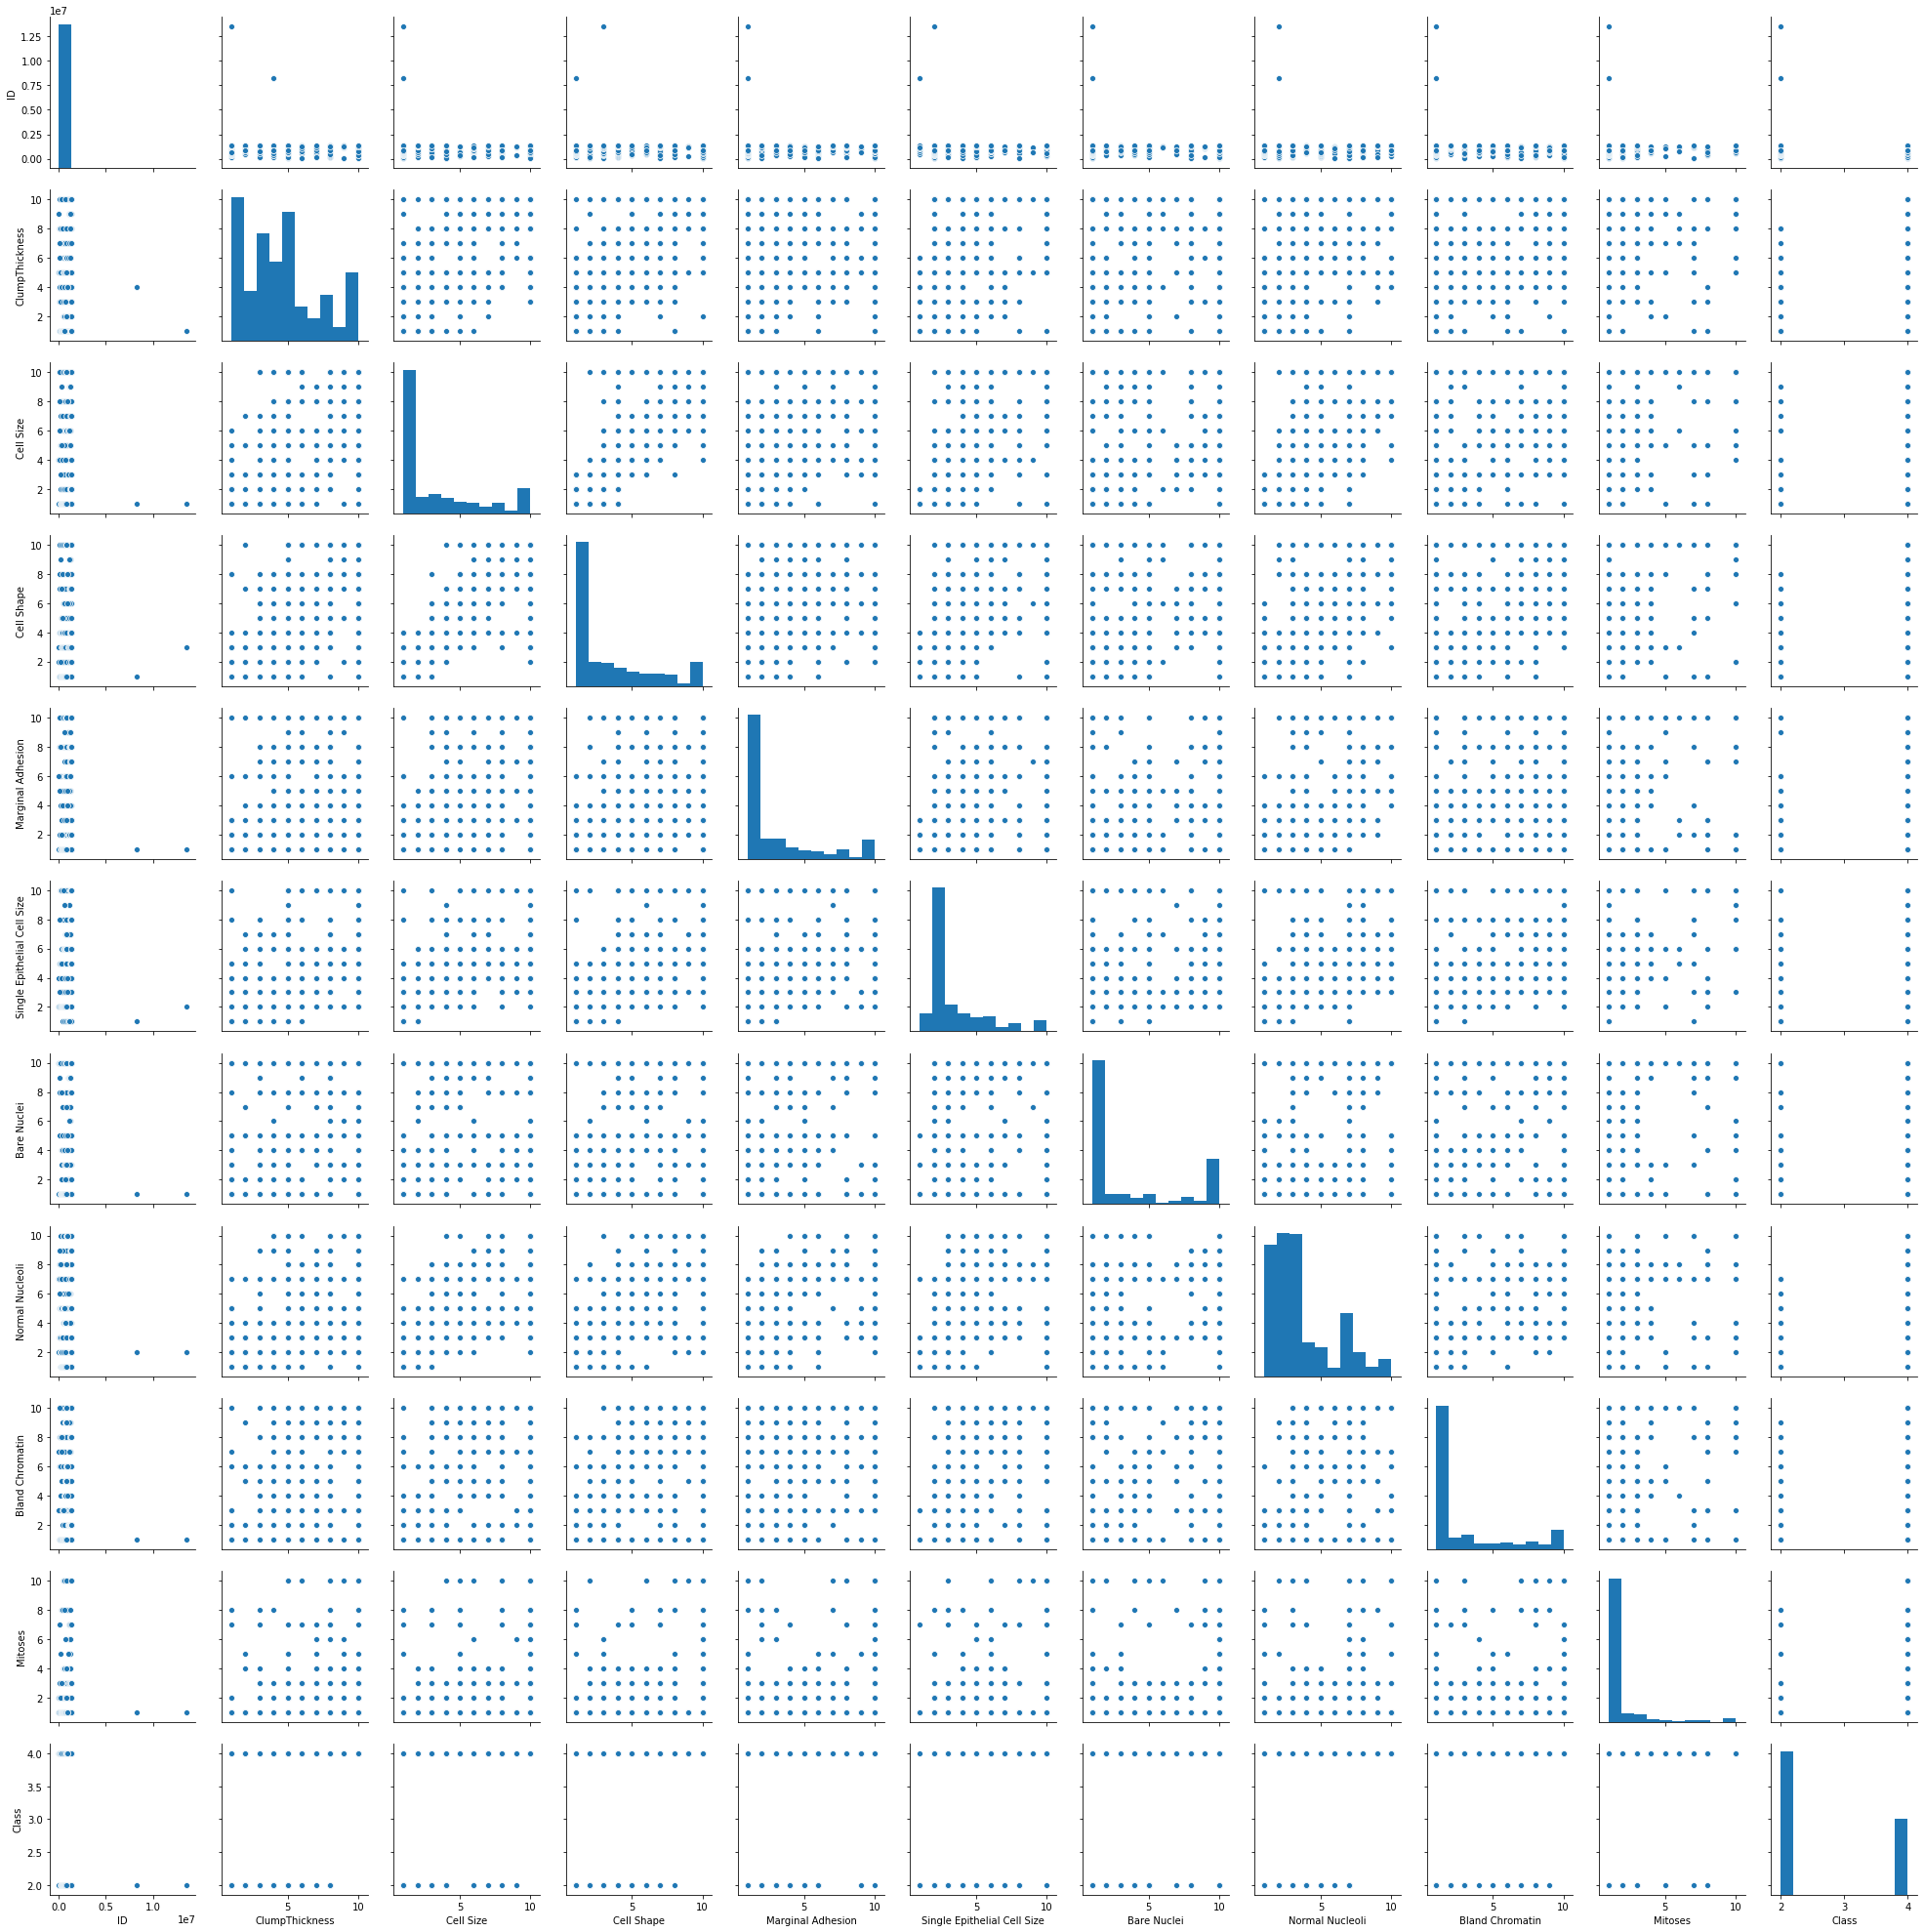

In [35]:
sns.pairplot(df)

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [45]:
# df = df.drop(['Class','ID'])
df = df.drop(['ID','Class'], axis=1)
from scipy.stats import zscore
df = df.apply(zscore)

# Q6 Create a covariance matrix for identifying Principal components

In [47]:
cov_matrix = np.cov(df,rowvar=False)
cov_matrix

array([[1.00143266, 0.64583645, 0.65552689, 0.48705303, 0.52256381,
        0.5908535 , 0.5592282 , 0.53660222, 0.35053534],
       [0.64583645, 1.00143266, 0.90818117, 0.70659267, 0.75287621,
        0.68765657, 0.75680368, 0.72390044, 0.4593503 ],
       [0.65552689, 0.90818117, 1.00143266, 0.68405782, 0.72069948,
        0.70848734, 0.73700282, 0.72047704, 0.43953974],
       [0.48705303, 0.70659267, 0.68405782, 1.00143266, 0.60045809,
        0.66792658, 0.66767051, 0.60421681, 0.41823111],
       [0.52256381, 0.75287621, 0.72069948, 0.60045809, 1.00143266,
        0.5845377 , 0.61698451, 0.62978166, 0.47978787],
       [0.5908535 , 0.68765657, 0.70848734, 0.66792658, 0.5845377 ,
        1.00143266, 0.67518063, 0.5756016 , 0.34288766],
       [0.5592282 , 0.75680368, 0.73700282, 0.66767051, 0.61698451,
        0.67518063, 1.00143266, 0.66683179, 0.34466258],
       [0.53660222, 0.72390044, 0.72047704, 0.60421681, 0.62978166,
        0.5756016 , 0.66683179, 1.00143266, 0.42894941],


# Q7 Identify eigen values and eigen vector

In [53]:
eigen_val, eigen_vect = np.linalg.eig(cov_matrix)
print(eigen_val)
print(eigen_vect)

[5.8985519  0.77588307 0.53960155 0.08894898 0.46640555 0.38101776
 0.26233452 0.30405592 0.29609474]
[[-0.30280515  0.14602888 -0.86221719  0.0014072  -0.08821658  0.07192848
   0.24081701  0.26946934 -0.00131277]
 [-0.38119012  0.04956364  0.01909154  0.73568065  0.2026394  -0.13735749
  -0.44088652  0.1000979   0.21521315]
 [-0.37757351  0.08526953 -0.0345843  -0.66537497  0.17515522 -0.10469081
  -0.58600968  0.03200191  0.14204379]
 [-0.33282286  0.04471887  0.42144828 -0.04671812 -0.4703171   0.03462797
   0.11866965  0.68083355 -0.0861038 ]
 [-0.33639134 -0.16403795  0.11010437 -0.06786939  0.37332927 -0.68258246
   0.45057208 -0.03559797 -0.18337725]
 [-0.33349748  0.2477099  -0.00367104  0.07339423 -0.5431767  -0.1275059
  -0.10299896 -0.57486596 -0.41187463]
 [-0.3459564   0.22994199  0.19744944 -0.05881119 -0.00698988  0.25519148
   0.40975993 -0.31459721  0.67301535]
 [-0.33584019 -0.02502678  0.13164974  0.01889835  0.45537199  0.63180293
   0.08247514 -0.03841564 -0.50406

# Q8 Find variance and cumulative variance by each eigen vector

In [63]:
total = sum(eigen_val)
variance_explained = [(i/total) * 100 for i in sorted(eigen_val, reverse=True)]
cum_variance_explained = np.cumsum(variance_explained)

print(cum_variance_explained)

[ 65.4457038   74.05429355  80.04128903  85.21615907  89.44363313
  92.81719904  96.10243391  99.01309194 100.        ]


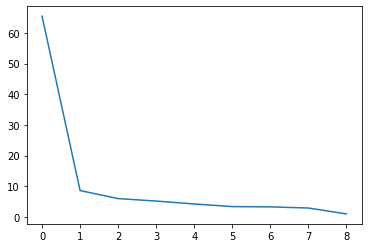

In [68]:
plt.plot(variance_explained)

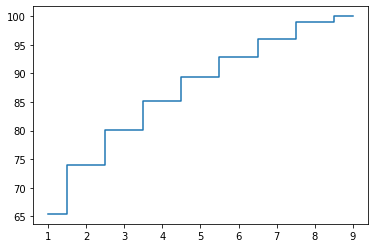

In [71]:
plt.step(y=cum_variance_explained, x=np.arange(1, eigen_val.size + 1), where='mid')

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca.fit(df)
df_transformed = pca.transform(df)
pca.components_

array([[ 0.30280515,  0.38119012,  0.37757351,  0.33282286,  0.33639134,
         0.33349748,  0.3459564 ,  0.33584019,  0.22981766],
       [-0.14602888, -0.04956364, -0.08526953, -0.04471887,  0.16403795,
        -0.2477099 , -0.22994199,  0.02502678,  0.90839421],
       [-0.86221719,  0.01909154, -0.0345843 ,  0.42144828,  0.11010437,
        -0.00367104,  0.19744944,  0.13164974, -0.09459348],
       [-0.08821658,  0.2026394 ,  0.17515522, -0.4703171 ,  0.37332927,
        -0.5431767 , -0.00698988,  0.45537199, -0.23968608],
       [-0.07192848,  0.13735749,  0.10469081, -0.03462797,  0.68258246,
         0.1275059 , -0.25519148, -0.63180293, -0.1316273 ],
       [ 0.26946934,  0.1000979 ,  0.03200191,  0.68083355, -0.03559797,
        -0.57486596, -0.31459721, -0.03841564, -0.14360708],
       [-0.00131277,  0.21521315,  0.14204379, -0.0861038 , -0.18337725,
        -0.41187463,  0.67301535, -0.50406321,  0.12567403]])

# Q10 Find correlation between components and features

In [79]:
df_comp = pd.DataFrame(pca.components_, columns=list(df))
df_comp.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.302805,0.381190,0.377574,0.332823,0.336391,0.333497,0.345956,0.335840,0.229818
1,-0.146029,-0.049564,-0.085270,-0.044719,0.164038,-0.247710,-0.229942,0.025027,0.908394
2,-0.862217,0.019092,-0.034584,0.421448,0.110104,-0.003671,0.197449,0.131650,-0.094593
3,-0.088217,0.202639,0.175155,-0.470317,0.373329,-0.543177,-0.006990,0.455372,-0.239686
4,-0.071928,0.137357,0.104691,-0.034628,0.682582,0.127506,-0.255191,-0.631803,-0.131627


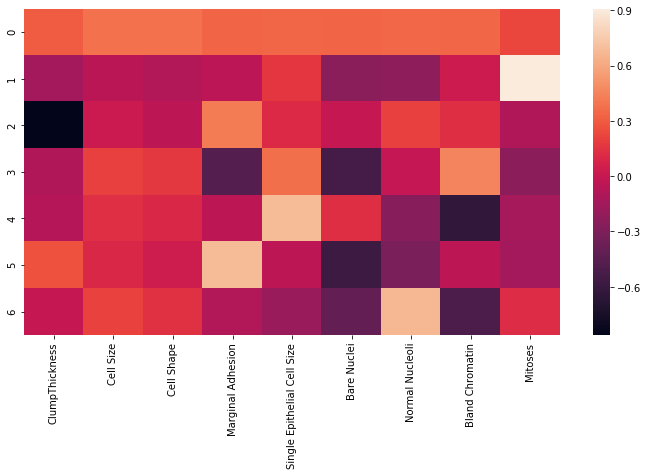

In [80]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp)